In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
worksp = r'C:\Users\raman\OneDrive\MSx\CMC\Interview Prep'

# set the working directory to the location of the data files
os.chdir(worksp)

In [35]:
# create a NxT matrix of sntadard normal distributed random numbers
N = 100
T = 100000
Zij = np.random.randn(N,T)


X = Zij.copy()

def corr_analysis(corr_matrix):
    # calculate the correlation matrix
    corr = np.corrcoef(corr_matrix)

    # # create heatmap of the numpy ndarray corr
    # sns.heatmap(corr, annot=True, cmap='coolwarm')
    
    # set diagonal elements to NaN
    np.fill_diagonal(corr, np.nan)
    
    # calculate the average of corr ignoring the NaNs
    print(np.nanmean(corr))
    
corr_analysis(X)

-4.121883666235887e-06


In [41]:
# create a 1xT matrix of standard normal distributed random numbers
Zj = np.random.randn(1,T)

# convert Zj to a matrix of size 1xT
Zj = np.matrix(Zj)

rho = 0.5
# add the 1xT matrix Zj to each row of Zij
X2 = np.sqrt(rho)*Zj + np.sqrt(1-rho)*Zij

corr_analysis(X2)


0.4997794500185215


[1.05877592 0.9423753  1.05775479 0.94403422 1.05460711 1.05251925
 1.05153284 0.94721805 1.04988662 0.94870104 0.94946133 0.9510435
 0.95165299 1.04798071 1.04658441 1.04606142 1.04450256 0.95289475
 0.95545539 1.04284735 1.04264989 0.95599517 0.95690719 1.04033482
 1.03961064 1.03766187 1.03666879 0.96031767 0.96058273 0.9616806
 0.96308474 1.03569701 1.03378775 1.03272621 1.031997   0.96365943
 1.03076172 1.02806797 1.02817355 0.96480733 0.96551377 0.96747142
 0.96873871 1.02557895 0.97018913 0.97159564 1.02499349 0.97290207
 1.02356623 1.02289099 1.02237861 0.97483761 1.02047202 1.01984999
 1.01840108 1.01848725 0.97568359 0.97632067 0.97677701 0.978296
 1.01653821 1.01642642 0.97955504 1.01444192 1.01422481 0.98023154
 0.98069237 1.01269026 0.98241962 1.01213218 0.98116625 1.01163112
 0.9840997  1.00988242 0.98457896 0.98671118 0.98500784 0.98851896
 0.98967422 1.00451625 1.00678574 1.00768676 1.00774213 1.00373337
 0.99310233 0.99470235 0.99421361 0.98548726 1.00195602 0.99885904

C:\Users\raman\AppData\Local\Temp\ipykernel_8400\2089846800.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eigvals, hist=True, kde=True,


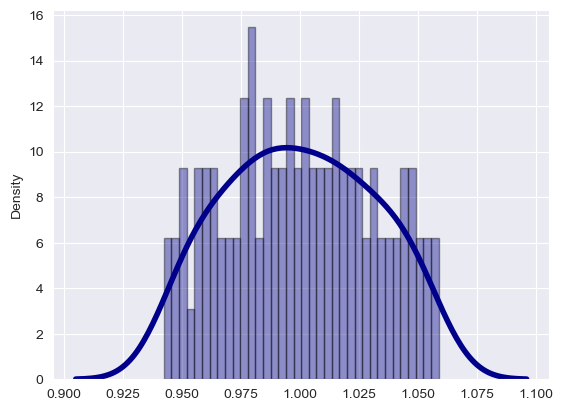

In [46]:
# compute the Hellinger distance between two distributions
def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / np.sqrt(2)

# plot the distribution of eigenvalues of the correlation matrix
def plot_eigenvalues(corr_matrix):
    # calculate the correlation matrix
    corr = np.corrcoef(corr_matrix)
    
    # calculate the eigenvalues of the correlation matrix
    eigvals = np.linalg.eigvals(corr)
    print(eigvals)
    
    # plot the eigenvalues and the probability density function
    sns.distplot(eigvals, hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    
    # calculate the Hellinger distance between the eigenvalues and the uniform distribution
    print(hellinger(eigvals, np.ones(len(eigvals))/len(eigvals)))
    
plot_eigenvalues(X)

In [ ]:
# create the Marchenko-Pastur distribution function for a given value of gamma and sigma
def marchenko_pastur(gamma, sigma):
    # define the upper and lower bounds of the distribution
    lower = sigma**2 * (1 - np.sqrt(gamma))**2
    upper = sigma**2 * (1 + np.sqrt(gamma))**2
    
    # define the function
    def f(x):
        return np.sqrt((upper - x) * (x - lower)) / (sigma * x * np.pi * gamma)
    
    return f